# Start-up spending versus profit 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('50_Startups.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending. Source: https://www.kaggle.com/datasets/farhanmd29/50-startups

In [ ]:
df = pd.read_csv('50_Startups.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### The data 

In [6]:
df = pd.read_csv('50_Startups.csv')
#all columns except for the last one
X = df.iloc[:, :-1].values
#last column
y = df.iloc[:, -1].values

In [34]:
display(df.head())

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Amount of money spend on marketing versus profit 

Since it is unclear if '0' marketing spend indead means the start-ups did not spend anything on marketing or that '0' was filled out when the number are unknown, I did not take them out.  

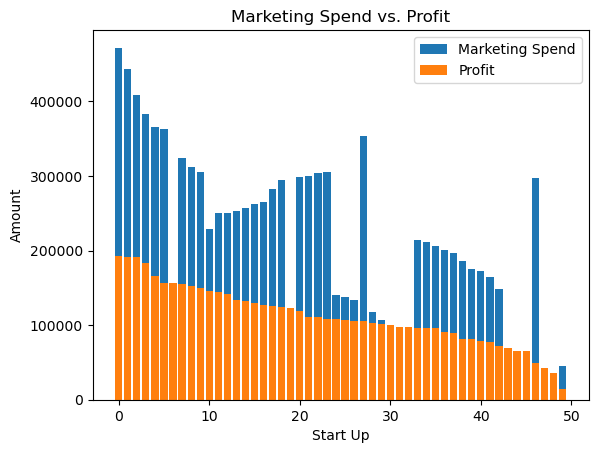

In [5]:
plt.bar(df.index, df['Marketing Spend'], label='Marketing Spend')
plt.bar(df.index, df['Profit'], label='Profit')

plt.xlabel('Start Up')
plt.ylabel('Amount')
plt.title('Marketing Spend vs. Profit')

plt.legend()
plt.show()

This scatter plot gives an overview of what cost start-ups the most compared to their profit. 

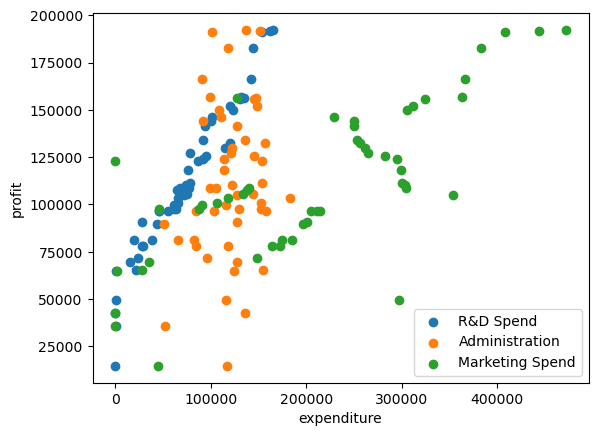

In [10]:
plt.scatter(x=df["R&D Spend"] , y=df["Profit"])
plt.scatter(x=df["Administration"] , y=df["Profit"])
plt.scatter(x=df["Marketing Spend"] , y=df["Profit"])
plt.legend(["R&D Spend" , "Administration" , "Marketing Spend"])
plt.ylabel('profit')
plt.xlabel('expenditure')
plt.show()

###  This Heatmap shows the correlation between R&D Spend, Administration, Marketing Spend and Profit. The closer to '1' , the more they are correlated. For example: there is a high correlation between R&D spend and the profit that a start-up have made. 

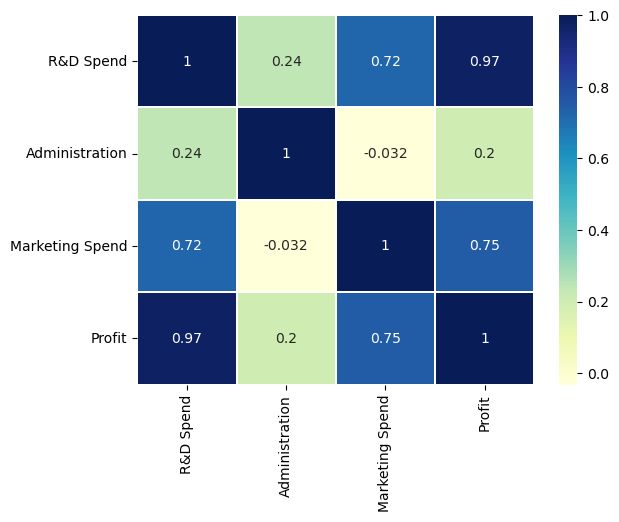

In [41]:
sns.heatmap(df.corr() , cmap='YlGnBu' ,annot=True ,linewidths='0.2')
plt.show()

### This boxplot shows that of the start-ups in New York 3 are outliers: their spending versus their profit show a different pattern than the general pattern. 

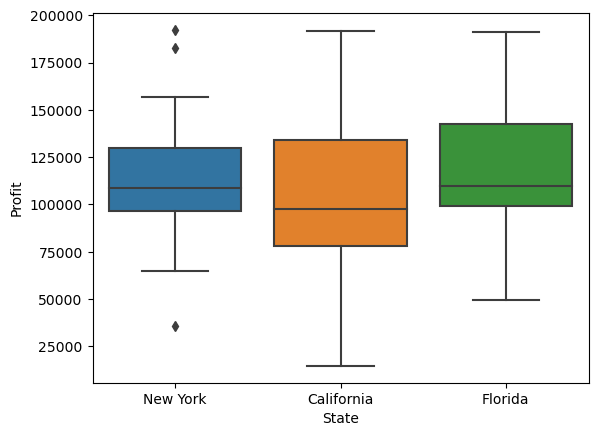

In [19]:
sns.boxplot(x="State" , y="Profit" , data=df)
plt.show()

### The distribution of the profit made by the start-ups is normal

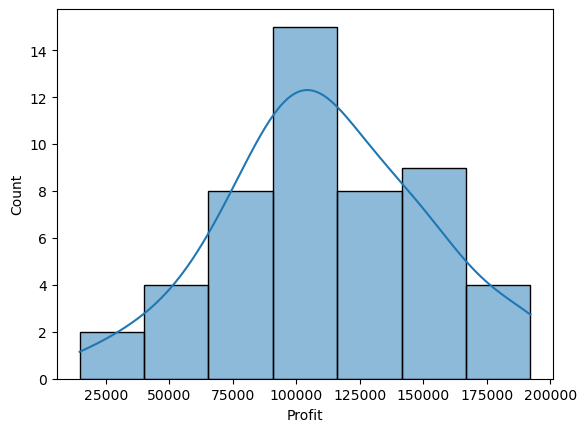

In [20]:
sns.histplot(data = df["Profit"] , kde=True)
plt.show()

### These plots give an overview of the correlation between R&D spend, administration and marketing spend and profit. The impact of the R&D as well as marketing spend is positive for start-ups in all three states. The same can be said about expenditure for administration in New York, however, the impact of administration is moderate for the start-ups in Calafornia and even negative for the start-ups in Florida. This outcome can help future start-ups to reconsider that spending on administration.

<Figure size 2000x1000 with 0 Axes>

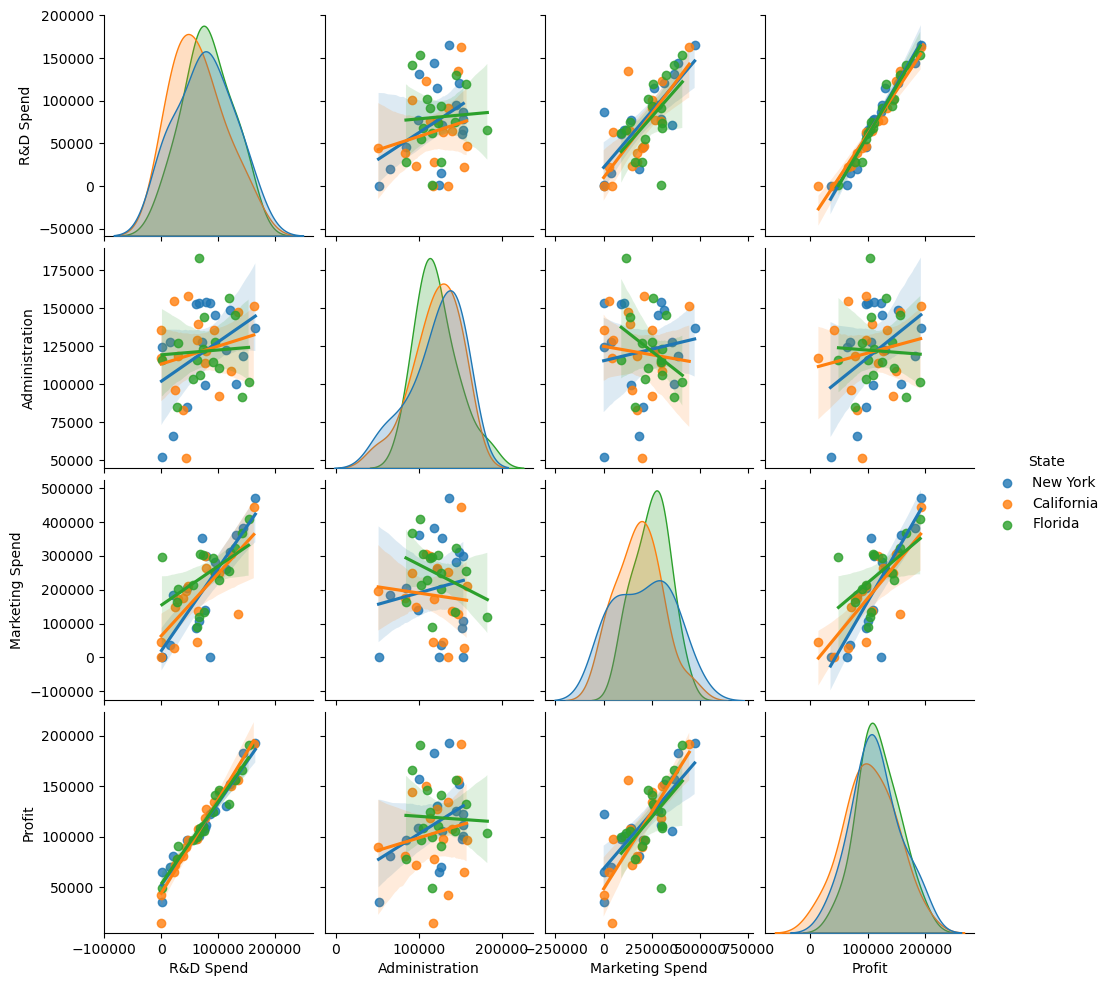

In [22]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df,hue='State',kind='reg')
plt.show()

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

I have trained a model to learn the relationship between the independent variables X_train (R&D spend, adminitration and marketing spend) the dependent variable y_train (profit). This knowledge helps to forecast if a start-up will be succesfull in terms of profit. 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
display(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### I have trained a model to learn the relationship between the independent variables X_train (R&D spend, adminitration and marketing spend) the dependent variable y_train (profit). This knowledge helps to forecast if a start-up will be succesfull in terms of profit.This plot show that the actual values retrieved from the data and the predicted values lay very close to eachother. This means the model was trained well and could be used to make predictions for new start-ups.

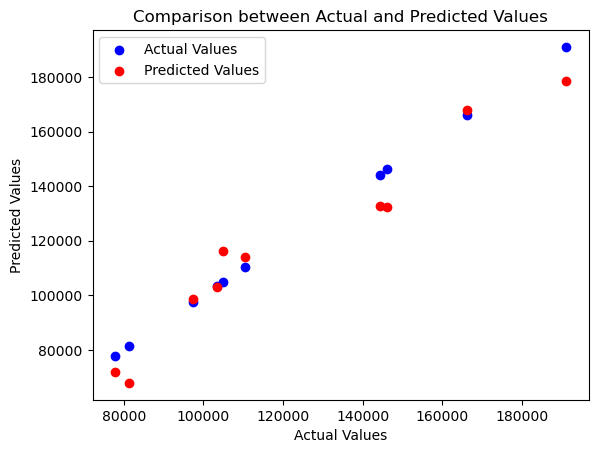

In [17]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test, c='blue', label='Actual Values')
ax.scatter(y_test, y_pred, c='red', label='Predicted Values')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Comparison between Actual and Predicted Values")
ax.legend()
plt.show()